# Data Pre-procesing Step

In [11]:
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd

In [12]:
dataset = pd.read_excel('../user_data.xlsx')

In [13]:
# Extracting Independent Variable:
x = dataset.iloc[:, [2, 3]].values

In [14]:
# Extracting Dependent Variable:
y = dataset.iloc[:, 4].values

In [15]:
# Splitting the dataset into Training set and Test set:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.25,
                                                    random_state=0)

In [16]:
# Feature Scaling:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [17]:
# Fitting Logistic Regression to the Training set:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [18]:
# Predicting the Test set results:
y_pred = classifier.predict(x_test)

In [20]:
# Making the Confusion Matrix:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[4, 0],
       [0, 2]], dtype=int64)

C:\Users\taqua\AppData\Local\Temp\ipykernel_28268\1247703292.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


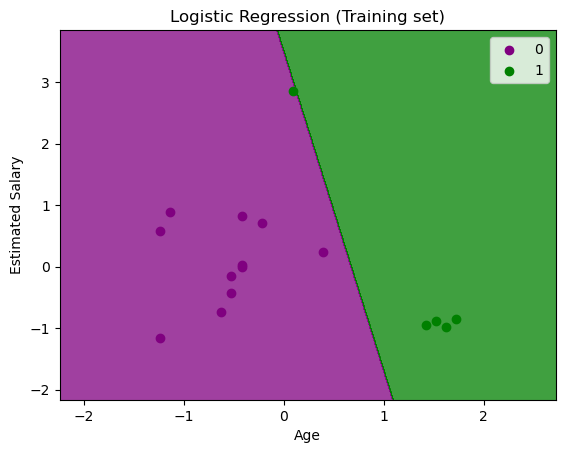

In [22]:
# Visualising the Training set results:
from matplotlib.colors import ListedColormap

x_set, y_set = x_train, y_train
x1, x2 = nm.meshgrid(nm.arange(start=x_set[:, 0].min() - 1, stop
=x_set[:, 0].max() + 1, step=0.01),
                     nm.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max()
                                                                 + 1, step=0.01))
mtp.contourf(x1, x2, classifier.predict(nm.array([x1.ravel(),
                                                  x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('purple', 'green')))
mtp.xlim(x1.min(), x1.max())
mtp.ylim(x2.min(), x2.max())
for i, j in enumerate(nm.unique(y_set)):
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(('purple', 'green'))(i), label=j)
mtp.title('Logistic Regression (Training set)')
mtp.xlabel('Age')
mtp.ylabel('Estimated Salary')
mtp.legend()
mtp.show()